In [159]:
import json
from pathlib import Path
import numpy as np
import pandas as pd

from rdkit import Chem
from rdkit.Chem.Descriptors import ExactMolWt,MolWt
from retrorules_gdr_2021.rule_burner import RuleBurner
from retrorules_gdr_2021.data import ExperimentalData, RuleData,ResultMatcher
from retrorules_gdr_2021.frag import Fragmenter
from retrorules_gdr_2021.workflow import Workflow

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#rules_path = "/home/yann/Data/RetroRules/retrorules_rr02_rp3_hs/retrorules_rr02_flat_all.tsv"
#rb = RuleBurner(rules_path=rules_path)

mgf_path = "/home/yann/Nextcloud/MetWork/Data/Sideritis/mgf_réseau_7fractions_Irlande.mgf"
exp_data = ExperimentalData(mgf_path)

In [3]:
input_smiles = [
    "[H]C1(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C(O)=C2)OC(COC(C)=O)C(O)C(O)C1O",
    "CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C=C2)C(O)C(O)C1O",
    "CC(=O)OCC1OC(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C(O)=C2)C(O)C(O)C1O",
    "[H]C1(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(OC)C=C2)OC(COC(C)=O)C(O)C(O)C1O",
    
]
input_scans =[
    "175",
    "168","191","190",
    
       ]

In [4]:
wf = Workflow(
    input_smiles=input_smiles,
    input_scans=input_scans,
    data_path="data/sideritis-{diameter}.csv",
    exp_data=exp_data,
    cosine_threshold=0.386)
wf.compute(6,16)


### compute for diameter 6

rule_results : 15065
total_structures : 1022
ms1_matching : 52
ms1_scan_matching : 12
DAEZTCGNIAIYCK-UHFFFAOYSA-N already fragedZBMJYIRYOATUPT-UHFFFAOYSA-N already fragedLORXOTCKKVEWGS-UHFFFAOYSA-N already fragedZOIVTTBRLWZSAT-UHFFFAOYSA-N already fraged


ZXQCHXLLIKMUTB-UHFFFAOYSA-N already fragedAXVCPTNYJJWIRE-UHFFFAOYSA-N already fragedPWOFHOJJMWJGLT-UHFFFAOYSA-N already fraged

PTKNECMMKRDZEG-UHFFFAOYSA-N already fraged
JXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
NXDNDRJNQJPXGJ-UHFFFAOYSA-N already fragedIKSMYAFBURMXFU-UHFFFAOYSA-N already fraged
LKPJBEBGOBIWTE-UHFFFAOYSA-N already fraged



UMLNUJYPKLOOFH-UHFFFAOYSA-N already fragedFGUGGFKMUNPFLW-UHFFFAOYSA-N already fragedRYYYVEJWVWQESE-UHFFFAOYSA-N already fragedFASLAPZDOQUPQJ-UHFFFAOYSA-N already fraged

CZTCJENOVUYVFY-UHFFFAOYSA-N already fragedLEJNCUJGPPAIGA-UHFFFAOYSA-N already fraged
QDHXJICHOOZXSC-UHFFFAOYSA-N already fraged

GSSZMVFZPDKXRX-UHFFFAOYSA-N already fraged
NQXNTUYDZAFJRV-UHFFFAOYSA-N

In [5]:
wf.scores

diameter  rule_results  total_structures  ms1_matching  ms1_scan_matching  \
0         6         15065              1022            52                 12   
1         8          3479               386            46                 12   
2        10          1445               191            14                  8   
3        12           746               108             9                  7   
4        14            72                18             7                  7   
5        16            44                14             5                  5   

   ms2_matching  ms2_scan_matching  ms2_scan_unique_matching  
0            25                  6                         2  
1            20                  6                         2  
2             8                  5                         2  
3             8                  5                         2  
4             6                  5                         4  
5             4                  3                         2

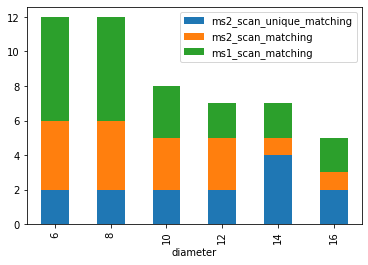

In [6]:
wf.plot_scans()

In [12]:
wf.rule_data.data.head()

rule_id substrate_id                                      product_list  \
0   11434            0  <rdkit.Chem.rdchem.Mol object at 0x7f08fbd55a40>   
0   11434            0  <rdkit.Chem.rdchem.Mol object at 0x7f08fbd551d0>   
1   11434            2  <rdkit.Chem.rdchem.Mol object at 0x7f08fc11d3b0>   
1   11434            2  <rdkit.Chem.rdchem.Mol object at 0x7f08fc11d270>   
2   16317            0  <rdkit.Chem.rdchem.Mol object at 0x7f08d95ad0e0>   

             product_inchikeys  \
0  BTTWVXRCJBJRRR-UHFFFAOYSA-N   
0  XLYOFNOQVPJJNP-UHFFFAOYSA-N   
1  YMLNKIMJXDCCEM-UHFFFAOYSA-N   
1  XLYOFNOQVPJJNP-UHFFFAOYSA-N   
2  ZSLZBFCDCINBPY-UHFFFAOYSA-N   

                                      product_inchis  \
0  InChI=1S/C35H40O24/c1-9(37)52-8-18-21(42)23(44...   
0                                  InChI=1S/H2O/h1H2   
1  InChI=1S/C37H42O25/c1-10(38)54-8-19-22(43)25(4...   
1                                  InChI=1S/H2O/h1H2   
2  InChI=1S/C23H38N7O17P3S/c1-12(31)51-7-6-25-14(...   

                                      product_smiles product_masses  
0  [H]OC(=O)C1([H])OC([H])(Oc2c([H])c([H])c(-c3oc...     844.190952  
0                                            [H]O[H]      18.010565  
1  [H]OC(=O)C1([H])OC([H])(Oc2c([H])c([H])c(-c3oc...     886.201517  
1                                            [H]O[H]      18.010565  
2  [H]OC(=NC([H])([H])C([H])([H])SC(=O)C([H])([H]...     809.125774

In [116]:
df_input=pd.DataFrame({"smiles":wf.input_smiles, "inchikey":wf.input_inchikeys, "scans": input_scans})
df_input

smiles  \
0  [H]C1(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)...   
1  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
2  CC(=O)OCC1OC(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)...   
3  [H]C1(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(...   

                      inchikey scans  
0  HLGKHCVGTSTFAJ-UHFFFAOYSA-N   175  
1  WINFSIMEBFWGGD-UHFFFAOYSA-N   168  
2  FTPMODVTXJGVCJ-UHFFFAOYSA-N   191  
3  IQDPCQNHHMHGJX-UHFFFAOYSA-N   190

In [128]:
#wf.compute(16,16)
products = network_df.loc[:, ["product_inchikeys", "product_smiles_x", "scans_x", "cosine"]]
products.columns = ["inchikey", "smiles", "scans", "cosine"]
nodes = pd.concat([
    df_input,
    products]
).drop_duplicates()

In [149]:
rule_data.head()

Unnamed: 0  rule_id  substrate_id  \
0           0    10021             1   
1           0    10021             1   
5           2    10023             1   
6           2    10023             1   
7           2    10023             1   

                                       product_list  \
0  <rdkit.Chem.rdchem.Mol object at 0x7fde6c6e8180>   
1  <rdkit.Chem.rdchem.Mol object at 0x7fde6c6e8450>   
5  <rdkit.Chem.rdchem.Mol object at 0x7fde6c6f07c0>   
6  <rdkit.Chem.rdchem.Mol object at 0x7fde6c6f04f0>   
7  <rdkit.Chem.rdchem.Mol object at 0x7fde6c6f0e00>   

             product_inchikeys  \
0  XLYOFNOQVPJJNP-UHFFFAOYSA-N   
1  DAEZTCGNIAIYCK-UHFFFAOYSA-N   
5  ZBMJYIRYOATUPT-UHFFFAOYSA-N   
6  BOPGDPNILDQYTO-UHFFFAOYSA-N   
7  BOPGDPNILDQYTO-UHFFFAOYSA-N   

                                      product_inchis  \
0                                  InChI=1S/H2O/h1H2   
1  InChI=1S/C31H34O18/c1-11(33)43-10-20-23(38)25(...   
5  InChI=1S/C29H30O18/c1-9(30)42-8-16-18(34)20(36...   
6  InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17...   
7  InChI=1S/C21H29N7O14P2/c22-17-12-19(25-7-24-17...   

                                      product_smiles  product_masses  \
0                                            [H]O[H]       18.010565   
1  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...      694.174514   
5  [H]OC(=O)C1([H])OC([H])(Oc2c([H])c(O[H])c3c(=O...      666.143214   
6  [H]N=C(O[H])C1=C([H])N(C2([H])OC([H])(C([H])([...      665.124772   
7  [H]N=C(O[H])C1=C([H])N(C2([H])OC([H])(C([H])([...      665.124772   

                                              smiles  \
0  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
1  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
5  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
6  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
7  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   

                      inchikey scans  
0  WINFSIMEBFWGGD-UHFFFAOYSA-N   168  
1  WINFSIMEBFWGGD-UHFFFAOYSA-N   168  
5  WINFSIMEBFWGGD-UHFFFAOYSA-N   168  
6  WINFSIMEBFWGGD-UHFFFAOYSA-N   168  
7  WINFSIMEBFWGGD-UHFFFAOYSA-N   168

In [120]:
network_df.head()

Unnamed: 0  rule_id  substrate_id  \
0           4    16317             2   
1           8    16325             2   
2           3    16317             1   
3           7    16325             1   
4          12    19752             1   

                                       product_list  \
0  <rdkit.Chem.rdchem.Mol object at 0x7f08d9584630>   
1  <rdkit.Chem.rdchem.Mol object at 0x7f08d95ab860>   
2  <rdkit.Chem.rdchem.Mol object at 0x7f08d95ab810>   
3  <rdkit.Chem.rdchem.Mol object at 0x7f08eeba93b0>   
4  <rdkit.Chem.rdchem.Mol object at 0x7f08eedc1040>   

             product_inchikeys  \
0  JXIPMRDWQSYZND-UHFFFAOYSA-N   
1  JXIPMRDWQSYZND-UHFFFAOYSA-N   
2  PTKNECMMKRDZEG-UHFFFAOYSA-N   
3  PTKNECMMKRDZEG-UHFFFAOYSA-N   
4  NXDNDRJNQJPXGJ-UHFFFAOYSA-N   

                                      product_inchis  \
0  InChI=1S/C29H32O18/c1-9(31)42-8-18-21(37)24(40...   
1  InChI=1S/C29H32O18/c1-9(31)42-8-18-21(37)24(40...   
2  InChI=1S/C27H30O16/c28-7-15-18(33)21(36)23(38)...   
3  InChI=1S/C27H30O16/c28-7-15-18(33)21(36)23(38)...   
4  InChI=1S/C30H34O17/c1-11(32)42-10-19-22(36)24(...   

                                    product_smiles_x  product_masses  \
0  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      668.158864   
1  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      668.158864   
2  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      610.153385   
3  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      610.153385   
4  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...      666.179600   

                                              smiles  \
0  CC(=O)OCC1OC(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)...   
1  CC(=O)OCC1OC(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)...   
2  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
3  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
4  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   

                      inchikey scans_x  \
0  FTPMODVTXJGVCJ-UHFFFAOYSA-N     191   
1  FTPMODVTXJGVCJ-UHFFFAOYSA-N     191   
2  WINFSIMEBFWGGD-UHFFFAOYSA-N     168   
3  WINFSIMEBFWGGD-UHFFFAOYSA-N     168   
4  WINFSIMEBFWGGD-UHFFFAOYSA-N     168   

                                    product_smiles_y scans_y    cosine  
0  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...     175  0.452959  
1  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...     175  0.452959  
2  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...     152  0.494846  
3  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...     152  0.494846  
4  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     173  0.466331

In [171]:
elements = []
all_nodes = []
scans = []
for diameter in (16, 14, 12):
    wf.compute(diameter,diameter)
    rule_data = wf.rule_data.data
    rule_data = pd.merge(rule_data.astype({'substrate_id': 'int64'}),df_input, left_on="substrate_id", right_index=True)
    network_df = pd.merge(rule_data, wf.ms2_match,  on="product_inchikeys")

    edges = network_df.loc[:,["rule_id", "inchikey", "product_inchikeys"]]
    edges.columns = ["rule_id", "source", "target"]
    edges = edges.drop_duplicates(["source", "target"])
    edges  = edges[~edges.target.isin(all_nodes)]
    edges["max_diameter"]=diameter
    edges = [{"data": edge} for edge in edges.to_dict(orient="records")]

    products = network_df.loc[:, ["product_inchikeys", "product_smiles_x", "scans_y", "cosine"]]
    products.columns = ["inchikey", "smiles", "scans", "cosine"]
    nodes = pd.concat([
        df_input,
        products]
    ).drop_duplicates()
    nodes.cosine = round(nodes.cosine,2)
    scans.extend(list(nodes.scans))
    nodes = nodes.rename(columns={"inchikey":"id", "scans":"parent"})
    nodes  = nodes[~nodes.id.isin(all_nodes)]
    all_nodes.extend(list(nodes.id))
    nodes = [{"data": node} for node in nodes.to_dict(orient="records")]
    
    elements.extend([*nodes, *edges])

parents = [{"data": {"id": scan, "label":scan}} for scan in set(scans)]

elements.extend(parents)
Path("data", "network.json").write_text(json.dumps(elements))


### compute for diameter 16

rule_results : 44
total_structures : 14
ms1_matching : 5
ms1_scan_matching : 5
PTKNECMMKRDZEG-UHFFFAOYSA-N already fragedJXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
IKSMYAFBURMXFU-UHFFFAOYSA-N already fraged

PWOFHOJJMWJGLT-UHFFFAOYSA-N already fragedNXDNDRJNQJPXGJ-UHFFFAOYSA-N already fraged

No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
N

4823

28005

In [148]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
4    LKPJBEBGOBIWTE-UHFFFAOYSA-N   
52   PTKNECMMKRDZEG-UHFFFAOYSA-N   
2    NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
108  RWMIRBPJISMLLD-UHFFFAOYSA-N   
55   IKSMYAFBURMXFU-UHFFFAOYSA-N   
34   RYYYVEJWVWQESE-UHFFFAOYSA-N   
175  PWSXATCNKVDHPH-UHFFFAOYSA-N   
107  OVUXFMYOTONXPD-UHFFFAOYSA-N   
180  NQXINWYGFOWGKZ-UHFFFAOYSA-N   
9    ZOIVTTBRLWZSAT-UHFFFAOYSA-N   
7    LORXOTCKKVEWGS-UHFFFAOYSA-N   
33   FASLAPZDOQUPQJ-UHFFFAOYSA-N   
174  HMYWLBFMSXYWNB-UHFFFAOYSA-N   
3    PWOFHOJJMWJGLT-UHFFFAOYSA-N   
179  NAIKORBIYNIXRX-UHFFFAOYSA-N   
10   AXVCPTNYJJWIRE-UHFFFAOYSA-N   
8    ZXQCHXLLIKMUTB-UHFFFAOYSA-N   
109  BARFRJQQWUNYDT-UHFFFAOYSA-N   
176  KMBIZIOMXIYABQ-UHFFFAOYSA-N   
35   CZTCJENOVUYVFY-UHFFFAOYSA-N   

                                        product_smiles scans    cosine  
4    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   115  0.519263  
52   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
2    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
108  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   173  0.468085  
55   [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
34   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   173  0.457909  
175  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.469308  
107  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   182  0.459614  
180  [H]Oc1c(-c2c([H])c([H])c(OC([H])([H])[H])c([H]...   182  0.465155  
9    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.457157  
7    [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   182  0.455458  
33   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.452734  
174  [H]Oc1c([H])c([H])c([H])c(-c2oc3c(O[H])c(OC4([...   186  0.516028  
3    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185  
179  [H]Oc1c(-c2c([H])c([H])c(OC([H])([H])[H])c([H]...   194  0.483654  
10   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.477215  
8    [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   194  0.476499  
109  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   194  0.482463  
176  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.484907  
35   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.479761

In [82]:
wf.ms2_match.sort_values("scans").iloc[3].product_smiles

'[H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c([H])c1OC([H])([H])[H]'

In [75]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
0   PTKNECMMKRDZEG-UHFFFAOYSA-N   
3   IKSMYAFBURMXFU-UHFFFAOYSA-N   
10  NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
8   ZOIVTTBRLWZSAT-UHFFFAOYSA-N   
11  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
9   AXVCPTNYJJWIRE-UHFFFAOYSA-N   

                                       product_smiles scans    cosine  
0   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
3   [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
10  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
8   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.457157  
11  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185  
9   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.477215

In [77]:
wf.ms2_match.sort_values("scans").iloc[5].product_smiles

'[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1OC([H])([H])[H]'

In [69]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
0  PTKNECMMKRDZEG-UHFFFAOYSA-N   
3  IKSMYAFBURMXFU-UHFFFAOYSA-N   
8  NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
9  PWOFHOJJMWJGLT-UHFFFAOYSA-N   

                                      product_smiles scans    cosine  
0  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
3  [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
8  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
9  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185

In [88]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
4    LKPJBEBGOBIWTE-UHFFFAOYSA-N   
52   PTKNECMMKRDZEG-UHFFFAOYSA-N   
2    NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
108  RWMIRBPJISMLLD-UHFFFAOYSA-N   
55   IKSMYAFBURMXFU-UHFFFAOYSA-N   
34   RYYYVEJWVWQESE-UHFFFAOYSA-N   
175  PWSXATCNKVDHPH-UHFFFAOYSA-N   
107  OVUXFMYOTONXPD-UHFFFAOYSA-N   
180  NQXINWYGFOWGKZ-UHFFFAOYSA-N   
9    ZOIVTTBRLWZSAT-UHFFFAOYSA-N   
7    LORXOTCKKVEWGS-UHFFFAOYSA-N   
33   FASLAPZDOQUPQJ-UHFFFAOYSA-N   
174  HMYWLBFMSXYWNB-UHFFFAOYSA-N   
3    PWOFHOJJMWJGLT-UHFFFAOYSA-N   
179  NAIKORBIYNIXRX-UHFFFAOYSA-N   
10   AXVCPTNYJJWIRE-UHFFFAOYSA-N   
8    ZXQCHXLLIKMUTB-UHFFFAOYSA-N   
109  BARFRJQQWUNYDT-UHFFFAOYSA-N   
176  KMBIZIOMXIYABQ-UHFFFAOYSA-N   
35   CZTCJENOVUYVFY-UHFFFAOYSA-N   

                                        product_smiles scans    cosine  
4    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   115  0.519263  
52   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
2    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
108  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   173  0.468085  
55   [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
34   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   173  0.457909  
175  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.469308  
107  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   182  0.459614  
180  [H]Oc1c(-c2c([H])c([H])c(OC([H])([H])[H])c([H]...   182  0.465155  
9    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.457157  
7    [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   182  0.455458  
33   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.452734  
174  [H]Oc1c([H])c([H])c([H])c(-c2oc3c(O[H])c(OC4([...   186  0.516028  
3    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185  
179  [H]Oc1c(-c2c([H])c([H])c(OC([H])([H])[H])c([H]...   194  0.483654  
10   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.477215  
8    [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   194  0.476499  
109  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   194  0.482463  
176  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.484907  
35   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.479761

In [89]:
wf.ms2_match.sort_values("scans").iloc[0].product_smiles

'[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1[H]'

In [131]:
wf.compute(6,12)


### compute for diameter 6

rule_results : 15065
total_structures : 1022
ms1_matching : 52
ms1_scan_matching : 12
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadat

No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No com

In [132]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
0   PTKNECMMKRDZEG-UHFFFAOYSA-N   
3   NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
4   IKSMYAFBURMXFU-UHFFFAOYSA-N   
24  LORXOTCKKVEWGS-UHFFFAOYSA-N   
30  ZOIVTTBRLWZSAT-UHFFFAOYSA-N   
5   PWOFHOJJMWJGLT-UHFFFAOYSA-N   
25  ZXQCHXLLIKMUTB-UHFFFAOYSA-N   
31  AXVCPTNYJJWIRE-UHFFFAOYSA-N   

                                       product_smiles scans    cosine  
0   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
3   [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
4   [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
24  [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   182  0.455458  
30  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.457157  
5   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185  
25  [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   194  0.476499  
31  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.477215

In [141]:
product_inchikeys = wf.ms2_match.query("scans == '186'").product_inchikeys

In [142]:
rule_data = wf.rule_data.data.reset_index()

rule_data[rule_data.product_inchikeys.isin(product_inchikeys)]

index  Unnamed: 0  rule_id  substrate_id  \
124    126          61    16319             1   
138    142          67    16322             1   
141    146          69    16324             1   
155    162          75    16327             1   
315    323         153    19753             3   
319    327         155    19755             3   
496    506         243     2522             1   
515    525         252    29657             3   
567    577         278    31092             3   
666    677         328     9659             2   
717    729         353     9913             3   

                                         product_list  \
124  <rdkit.Chem.rdchem.Mol object at 0x7f579a1ae360>   
138  <rdkit.Chem.rdchem.Mol object at 0x7f57a3c0f680>   
141  <rdkit.Chem.rdchem.Mol object at 0x7f57a94259f0>   
155  <rdkit.Chem.rdchem.Mol object at 0x7f5799d57e00>   
315  <rdkit.Chem.rdchem.Mol object at 0x7f57a38c18b0>   
319  <rdkit.Chem.rdchem.Mol object at 0x7f57a3c16db0>   
496  <rdkit.Chem.rdchem.Mol object at 0x7f57a3c42f90>   
515  <rdkit.Chem.rdchem.Mol object at 0x7f5799e2bdb0>   
567  <rdkit.Chem.rdchem.Mol object at 0x7f57a934e900>   
666  <rdkit.Chem.rdchem.Mol object at 0x7f57a39bec70>   
717  <rdkit.Chem.rdchem.Mol object at 0x7f579a124ef0>   

               product_inchikeys  \
124  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
138  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
141  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
155  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
315  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
319  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
496  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
515  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
567  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
666  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
717  PWOFHOJJMWJGLT-UHFFFAOYSA-N   

                                        product_inchis  \
124  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
138  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
141  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
155  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
315  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
319  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
496  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
515  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
567  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
666  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
717  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   

                                        product_smiles  product_masses  
124  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
138  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
141  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
155  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
315  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
319  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
496  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
515  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
567  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
666  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
717  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514

In [126]:
rules_df_raw = pd.read_csv(rules_path, sep="\t")

In [146]:
rules_df = rules_df_raw.query(
                f"Diameter == {14} and ~Reaction_EC_number.isnull()"
            )
rule = rules_df.iloc[16324]
print(rule.Reaction_EC_number)
print(rule.Rule_SMILES)
print(rule)

3.1.1.6
[C]-[C](-[O]-[C]1(-[H])-[O]-[C](-[C](-[O]-[H])(-[H])-[H])(-[H])-[C](-[O]-[H])(-[H])-[C](-[O]-[H])(-[H])-[C]-1(-[O]-[H])-[H])(-[H])-[C]>>[C]-[C](-[O]-[C]1(-[H])-[O]-[C](-[C](-[O]-[C](-[C](-[H])(-[H])-[H])=[O])(-[H])-[H])(-[H])-[C](-[O]-[H])(-[H])-[C](-[O]-[H])(-[H])-[C]-1(-[O]-[H])-[H])(-[H])-[C].[O](-[H])-[H]
# Rule_ID                                        RR-02-038cb0ec7bb086d0-14-F
Legacy_ID                                                MNXR115838_MNXM8020
Reaction_ID                                                       MNXR115838
Diameter                                                                  14
Rule_order                                                                 1
Rule_SMARTS                ([#6&v4:1]-[#6&v4:2](-[#8&v2:3]-[#6&v4:4]1(-[#...
Substrate_ID                                                        MNXM8020
Substrate_SMILES           [H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C]([...
Product_IDs                                                   MNX

In [4]:
input_inchikeys = [
    Chem.MolToInchiKey(Chem.MolFromSmiles(smiles)) 
    for smiles in input_smiles
]
masses = [
    ExactMolWt(Chem.MolFromSmiles(smiles)) 
    for smiles in input_smiles
]
input_data = pd.DataFrame({"scans": scans, "product_smiles": input_smiles, "product_inchikeys": input_inchikeys, "product_masses": masses})
Fragmenter(input_data).gen_all_frag()

class InputData:
    def __init__(self, input_data):
        self.data = input_data
matcher = ResultMatcher(InputData(input_data), exp_data)
matcher.add_cosine()
cosine_threshold = matcher.match_data[matcher.match_data.scans.isin(scans)].cosine.mean()*0.8
print("cosine_threshold : ", cosine_threshold)

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()



(pid=12578) HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged
(pid=12578) WINFSIMEBFWGGD-UHFFFAOYSA-N already fraged
(pid=12578) FTPMODVTXJGVCJ-UHFFFAOYSA-N already fraged
(pid=12578) IQDPCQNHHMHGJX-UHFFFAOYSA-N already fraged
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.

In [55]:
# columns = ["diameter", *list(scores.columns)[3:]]

def plot_columns(columns, **kwargs):
    columns.reverse()
    df = scores.loc[:, columns]
    display(df)
    df_plot = df.diff(axis=1)
    df_plot[columns[0]] = df[columns[0]]
    df_plot.diameter = df.diameter
    df_plot.plot.bar(x="diameter", stacked=True, **kwargs)